In [3]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")

mapping={0 : "id",
         1 : "Beban Beton"
         }
file="Beton.csv"
df=pd.read_csv(file, header = None)
n=df.shape[1]

def DrawBoxplot(i):
    sns.boxplot(data=df[i])
    plt.title(mapping[i])
    plt.ylabel("Besar")
    
def DescribeData(i):
    data=df[i]
    index=pd.DataFrame(data)
    print("Rata-rata " + mapping[i] + " : " + str(data.mean()))
    print("Nilai Tengah " + mapping[i] + " : " + str(data.median()))
    if(data[data==index.value_counts().idxmax()].shape[0]!=1):
        print("Modus "+ mapping[i] + " : (Kolom kiri : indeks modus dimulai dari 0, Kolom kanan : modus)" )
        print(data.mode())
        print("Jumlah kemunculan modus : "+str(data[data==index.value_counts().idxmax()].shape[0]))
    else:
        print("Data tidak memiliki modus karena semua elemen bersifat unik")
    print("Standar Deviasi " + mapping[i] + " : " + str(data.std()))
    print("Variansi " + mapping[i] + " : " + str(data.var()))
    print("Range " + mapping[i] + " : " + str(data.max()-data.min()))
    print("Nilai Minimum " + mapping[i] + " : " + str(data.min()))
    print("Nilai Maksimum " + mapping[i] + " : " + str(data.max()))
    print("Quartil " + mapping[i] + " : ")
    print("\tQ1 : ",np.quantile(data, .25))
    print("\tQ2 : ",np.quantile(data, .50))
    print("\tQ3 : ",np.quantile(data, .75))
    print("IQR " + mapping[i] + " : "+ str(np.quantile(data, .75)-np.quantile(data, .25)))
    print("Skewness " + mapping[i] + " : "+ str(data.skew()))
    print("Kurtosis " + mapping[i] + " : "+ str(data.kurtosis()))
    print()
    
def DrawHistogram(i):
    df.hist(i,edgecolor='k')
    plt.title(mapping[i])
    plt.xlabel("Besar")
    plt.ylabel("jumlah")

    
def DrawScatter(i):
    df.plot.scatter(x=i,y=11,c=i,colormap="viridis")
    plt.xlabel(mapping[i])
    plt.ylabel("Kelas")

def Correlation(i):
    a=df[i]
    b=df[11]
    corr=np.corrcoef([a,b])[0,1]
    print(mapping[i]," dan ",mapping[11], "memiliki hubungan korelasi sebesar ",corr)
    if (corr>0):
        print("Korelasi berbanding lurus")
    elif (corr==0):
        print("Tidak memiliki korelasi")
    else:
        print("Korelasi berbanding terbalik")
    if(abs(corr)<0.25):
        print("Korelasi sangat lemah atau tidak berkorelasi")
    elif (0.25<=abs(corr)<0.5):
        print("Korelasi sedang")
    elif (0.5<=abs(corr)<0.75):
        print("Korelasi cukup kuat")
    else:
        print("Korelasi sangat kuat")
    DrawScatter(i)
    
def CheckNormality(i):
    data=df[i]
    stat, p=stats.shapiro(data)
    print("stat : ",round(stat,4),", p : ",p)
    if(p>0.05):
        print("Kemungkinan data berdistribusi normal")
    else:
        print("Kemungkinan data tidak berdistribusi normal")

def FValue(alpha, v1, v2):
    # mengembalikan nilai variabel f_alpha(v1, v2) pada distribusi F berderajat v1, v2, dengan distribusi peluang f > f_alpha sebesar alpha
    return stats.f.isf(dfn=v1, dfd=v2,q=alpha)

Jawaban kasus uji variansi beton
"Kuat tekanan beton 1 memiliki variansi yang sama dengan beton 2"
 Digunakan sampel acak berukuran 5 dan 5
1.	H0 : σ1^2 = σ2^2
2.	H1 : σ1^2 ≠ σ2^2
3.	α = 0.05
4.	Tes statistik
  	v1 = 4, v2 = 4, s1 = 40.321, s2 = 168.661
  	Digunakan tes statistik dengan f-value two-tailed
  	Daerah kritis pada f < f_(1 - α/2)(v1, v2) = 0.104 atau f > f_(α/2)(v1, v2) = 9.605
5.	Komputasi:
f = s1^2/s^2 = 0.239
Menerima H0 karena nilai uji f = 0.239 tidak terletak pada daerah kritis
Jadi, hipotesis null variansi kedua populasi beton sama, diterima


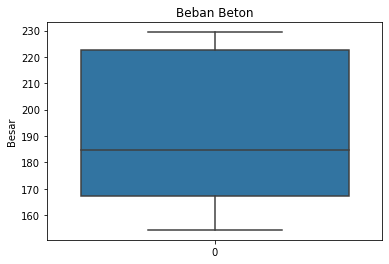

In [4]:
def AnswerBeton():
    print("Jawaban kasus uji variansi beton")
    print("\"Kuat tekanan beton 1 memiliki variansi yang sama dengan beton 2\"")
    print(" Digunakan sampel acak berukuran 5 dan 5")
    
    DrawBoxplot(1)

    # Variables
    populasi1 = df[1][:5]
    populasi2 = df[1][5:]
    n1 = 5
    n2 = 5
    sampel1 = populasi1.sample(n1)
    sampel2 = populasi2.sample(n2)
    std_sampel1 = (sampel1.std())**2
    std_sampel2 = (sampel2.std())**2
    v1 = n1 - 1
    v2 = n2 - 1
    α = 0.05
    f_left = FValue(1-α/2, v1, v2)   # f_(1 - α/2)(v1, v2)
    f_right = FValue(α/2, v1, v2)  # f_(α/2)(v1, v2)

    print("1.\tH0 : σ1^2 = σ2^2")
    print("2.\tH1 : σ1^2 ≠ σ2^2")
    print("3.\tα = {}".format(α))
    print("4.\tTes statistik")
    print("  \tv1 = {}, v2 = {}, s1 = {}, s2 = {}".format(v1, v2, round(std_sampel1, 3), round(std_sampel2, 3)))
    print("  \tDigunakan tes statistik dengan f-value two-tailed")
    
    print("  \tDaerah kritis pada f < f_(1 - α/2)(v1, v2) = {} atau f > f_(α/2)(v1, v2) = {}".format(round(f_left, 3), round(f_right, 3)))

    print("5.\tKomputasi:")
    f = std_sampel1 / std_sampel2
    print("f = s1^2/s^2 = {}".format(round(f, 3)))

    if (f < f_left or f > f_right):
        # f pada daerah kritis
        print("Menolak H0 karena nilai uji f = {} terletak pada daerah kritis".format(round(f, 3)))
        print("Jadi, hipotesis alternatif variansi kedua populasi beton berbeda, diterima")
    else:
        # f bukan daerah kritis
        print("Menerima H0 karena nilai uji f = {} tidak terletak pada daerah kritis".format(round(f, 3)))
        print("Jadi, hipotesis null variansi kedua populasi beton sama, diterima")

AnswerBeton()